In [2]:
%pwd

'/home/mmercier/Projects/bebida-on-batsim/experiments/HPC_workload_generation'

In [80]:
!./simgrid-TIT-calibration.py ti_traces_final/*.txt ../workloads/bebida_irl_workloads/smpi_profiles.json 4 ../platforms/platform_graphene_33nodes_1G_HDD.xml "graphene-1.nancy.grid5000.fr"

]0;IPython: experiments/HPC_workload_generationStarting calibration of ft.C.16 stage 0
Starting calibration of ft.C.4 stage 0
Starting calibration of ft.C.8 stage 0
Starting calibration of ft.D.128 stage 0
Starting calibration of ft.D.16 stage 0
Starting calibration of ft.D.32 stage 0
Starting calibration of ft.D.4 stage 0
Starting calibration of ft.D.8 stage 0
Starting calibration of ft.E.128 stage 0
Starting calibration of ft.E.32 stage 0
Starting calibration of is.D.32 stage 0
Starting calibration of is.D.64 stage 0
Starting calibration of lu.B.4 stage 0
Starting calibration of lu.C.16 stage 0
New scale factor for ft.C.4: 0.3090935072693956
New scale factor for ft.D.4: 1.3778402504689468e-10
Starting calibration of ft.C.4 stage 1
Starting calibration of ft.D.4 stage 1
New scale factor for ft.C.8: 0.5601580839576284
Starting calibration of ft.C.8 stage 1
New scale factor for ft.D.8: 0.023801154827270337
Starting calibration of ft.D.8 stage 1
New scale factor for ft.C.4: 0.973941447

In [20]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
pandas.options.display.float_format = "{:,.2f}".format
df = pandas.read_csv("./calibration.csv", index_col=0)
df

smpi_app  real_runtime     execution_time    stage  scale_factor
0    ft.C.16        113.80             171.32  stage_0          0.66
1    ft.C.16        113.80             136.78  stage_1          0.83
2    ft.C.16        113.80             125.34  stage_2          0.91
3    ft.C.16        113.80             120.13  stage_3          0.95
4    ft.C.16        113.80             117.42  stage_4          0.97
5     ft.C.4        138.16             446.98  stage_0          0.31
6     ft.C.4        138.16             141.86  stage_1          0.97
7     ft.C.8        170.80             304.91  stage_0          0.56
8     ft.C.8        170.80             210.45  stage_1          0.81
9     ft.C.8        170.80             187.79  stage_2          0.91
10    ft.C.8        170.80             178.96  stage_3          0.95
11  ft.D.128        411.35             497.03  stage_0          0.83
12  ft.D.128        411.35             450.04  stage_1          0.91
13  ft.D.128        411.35             430.69  stage_2          0.96
14   ft.D.16        113.94           4,288.67  stage_0          0.03
15   ft.D.16        113.94           1,468.71  stage_1          0.08
16   ft.D.16        113.94           1,405.19  stage_2          0.08
17   ft.D.32      1,446.03           1,646.03  stage_0          0.88
18   ft.D.32      1,446.03           1,544.50  stage_1          0.94
19   ft.D.32      1,446.03           1,497.36  stage_2          0.97
20    ft.D.4        137.25 996,124,187,497.69  stage_0          0.00
21    ft.D.4        137.25 996,124,179,864.35  stage_1          0.00
22    ft.D.8        172.94           7,266.03  stage_0          0.02
23    ft.D.8        172.94           1,987.73  stage_1          0.09
24    ft.D.8        172.94           1,893.56  stage_2          0.09
25  ft.E.128        405.83           4,169.35  stage_0          0.10
26  ft.E.128        405.83           2,021.12  stage_1          0.20
27  ft.E.128        405.83           1,847.17  stage_2          0.22
28  ft.E.128        405.83           1,813.57  stage_3          0.22
29   ft.E.32      1,440.49          25,424.46  stage_0          0.06
30   ft.E.32      1,440.49           7,505.72  stage_1          0.19
31   ft.E.32      1,440.49           6,709.21  stage_2          0.21
32   ft.E.32      1,440.49           6,552.47  stage_3          0.22
33   ft.E.32      1,440.49           6,519.14  stage_4          0.22
34   is.D.32        135.10           2,740.83  stage_0          0.05
35   is.D.32        135.10           2,656.75  stage_1          0.05
36   is.D.64         78.66           2,885.48  stage_0          0.03
37   is.D.64         78.66           2,840.46  stage_1          0.03
38    lu.B.4         88.58               1.61  stage_0         55.03
39    lu.B.4         88.58               1.61  stage_1         54.91
40    lu.B.4         88.58               1.85  stage_2         47.83
41    lu.B.4         88.58              26.89  stage_3          3.29
42    lu.B.4         88.58              88.46  stage_4          1.00
43   lu.C.16        104.88             176.45  stage_0          0.59
44   lu.C.16        104.88             176.45  stage_1          0.59

In [100]:
list(df.columns)

['smpi_app', 'real_runtime', 'execution_time', 'stage', 'scale_factor']

In [101]:
df.groupby(df.smpi_app).groups

{'ft.C.16': Int64Index([0, 1, 2, 3, 4], dtype='int64'),
 'ft.C.4': Int64Index([5, 6], dtype='int64'),
 'ft.C.8': Int64Index([7, 8, 9, 10], dtype='int64'),
 'ft.D.128': Int64Index([11, 12, 13], dtype='int64'),
 'ft.D.16': Int64Index([14, 15, 16], dtype='int64'),
 'ft.D.32': Int64Index([17, 18, 19], dtype='int64'),
 'ft.D.4': Int64Index([20, 21], dtype='int64'),
 'ft.D.8': Int64Index([22, 23, 24], dtype='int64'),
 'ft.E.128': Int64Index([25, 26, 27, 28], dtype='int64'),
 'ft.E.32': Int64Index([29, 30, 31, 32, 33], dtype='int64'),
 'is.D.32': Int64Index([34, 35], dtype='int64'),
 'is.D.64': Int64Index([36, 37], dtype='int64'),
 'lu.B.4': Int64Index([38, 39, 40, 41, 42], dtype='int64'),
 'lu.C.16': Int64Index([43, 44], dtype='int64')}

In [102]:
df.groupby(df.smpi_app).scale_factor.describe()

count  mean   std  min  25%   50%   75%   max
smpi_app                                               
ft.C.16    5.00  0.86  0.12 0.66 0.83  0.91  0.95  0.97
ft.C.4     2.00  0.64  0.47 0.31 0.48  0.64  0.81  0.97
ft.C.8     4.00  0.81  0.18 0.56 0.75  0.86  0.92  0.95
ft.D.128   3.00  0.90  0.07 0.83 0.87  0.91  0.93  0.96
ft.D.16    3.00  0.06  0.03 0.03 0.05  0.08  0.08  0.08
ft.D.32    3.00  0.93  0.04 0.88 0.91  0.94  0.95  0.97
ft.D.4     2.00  0.00  0.00 0.00 0.00  0.00  0.00  0.00
ft.D.8     3.00  0.07  0.04 0.02 0.06  0.09  0.09  0.09
ft.E.128   4.00  0.19  0.06 0.10 0.17  0.21  0.22  0.22
ft.E.32    5.00  0.18  0.07 0.06 0.19  0.21  0.22  0.22
is.D.32    2.00  0.05  0.00 0.05 0.05  0.05  0.05  0.05
is.D.64    2.00  0.03  0.00 0.03 0.03  0.03  0.03  0.03
lu.B.4     5.00 32.41 27.79 1.00 3.29 47.83 54.91 55.03
lu.C.16    2.00  0.59  0.00 0.59 0.59  0.59  0.59  0.59

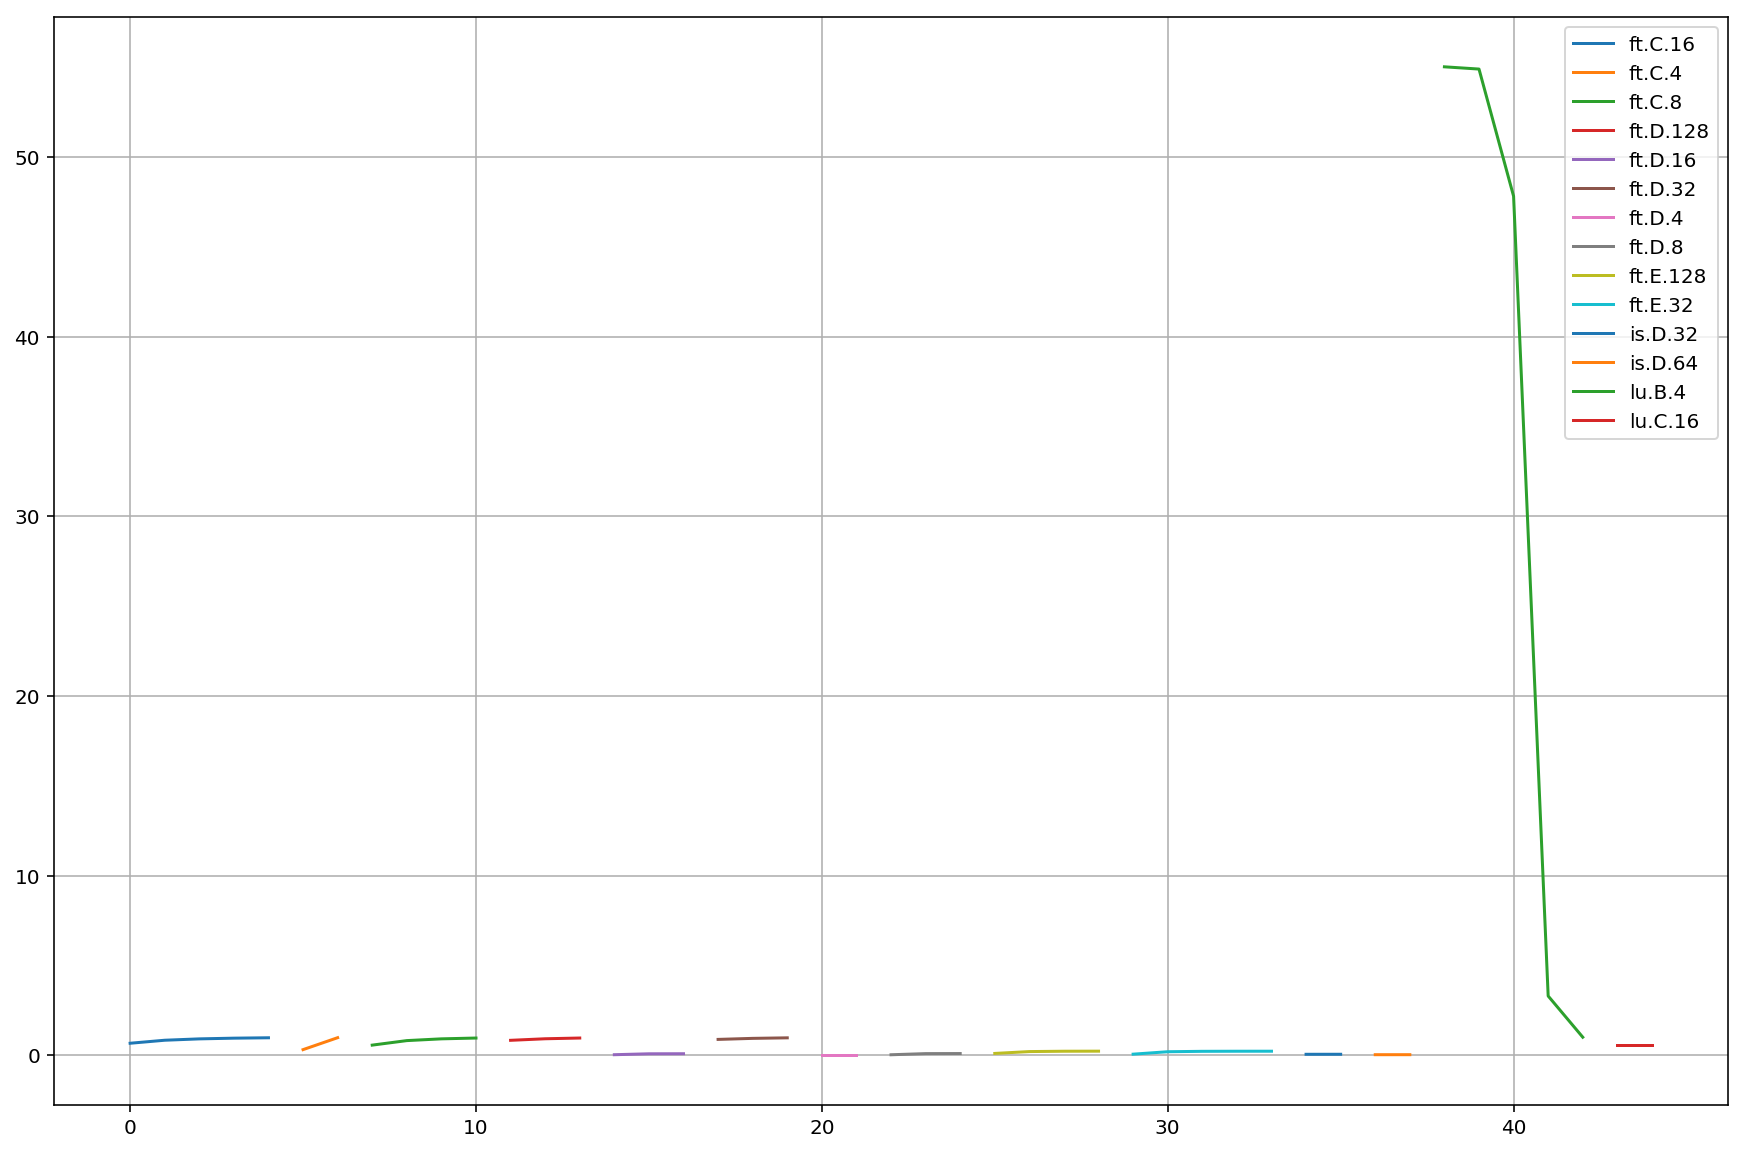

In [103]:
plt.figure(figsize=(15,10))

df.groupby(df.smpi_app).scale_factor.plot()
plt.grid()
plt.legend()


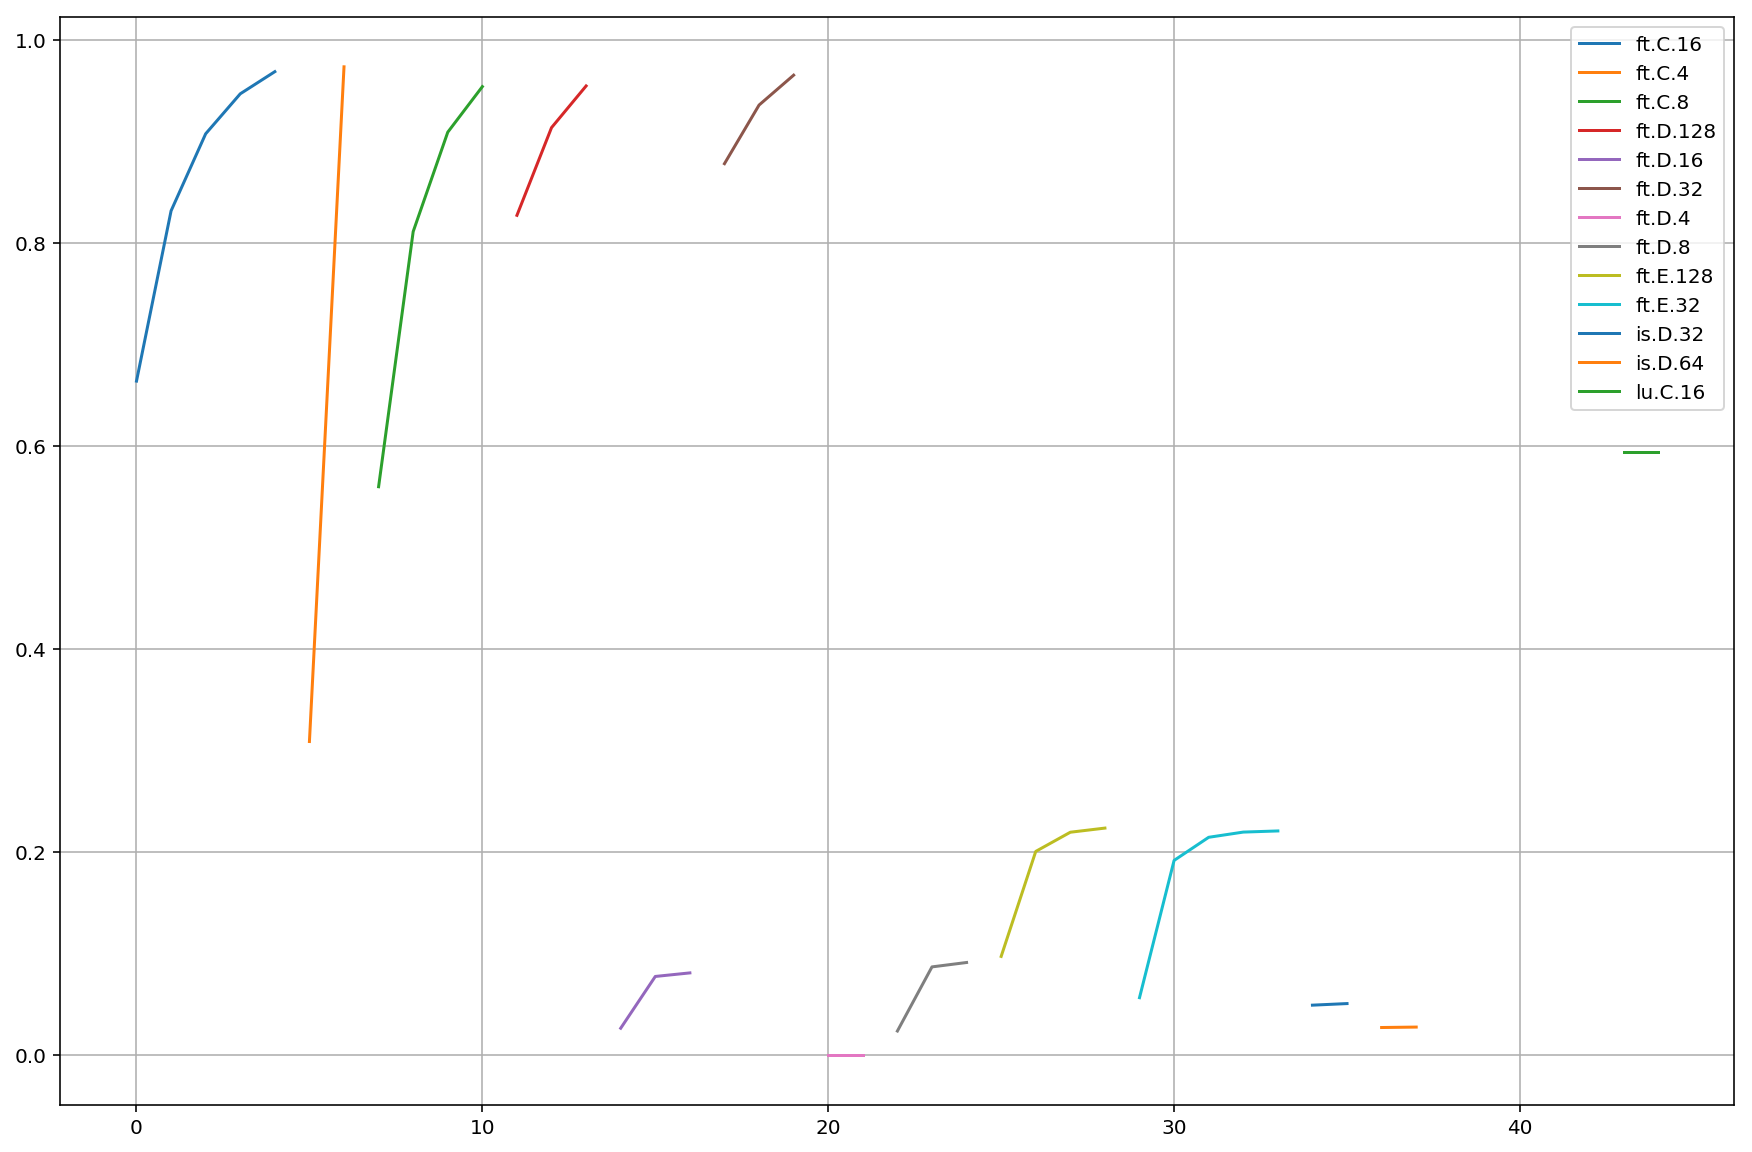

In [104]:
plt.figure(figsize=(15,10))
#remove outliers
df[df.smpi_app != "lu.B.4"].groupby(df.smpi_app).scale_factor.plot()
plt.grid()
plt.legend()

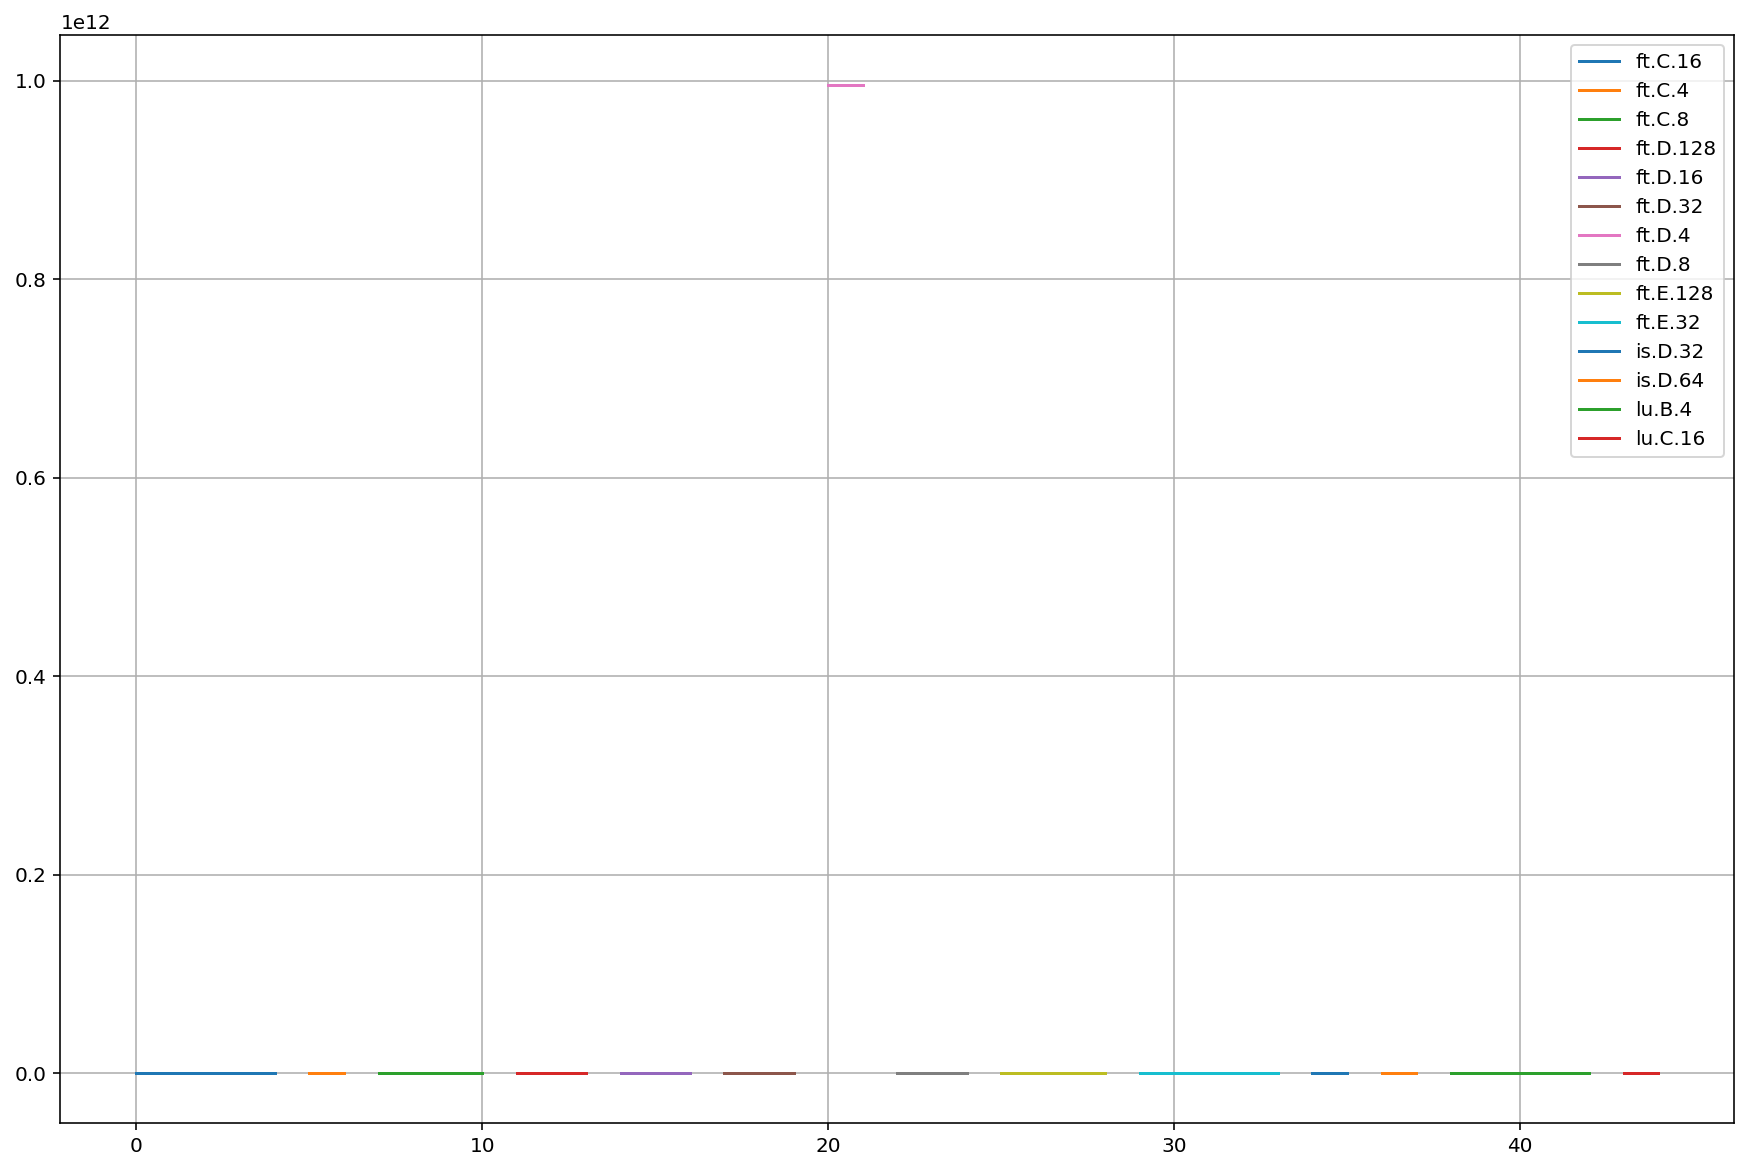

In [105]:
plt.figure(figsize=(15,10))

df.groupby(df.smpi_app).execution_time.plot()
plt.grid()
plt.legend()

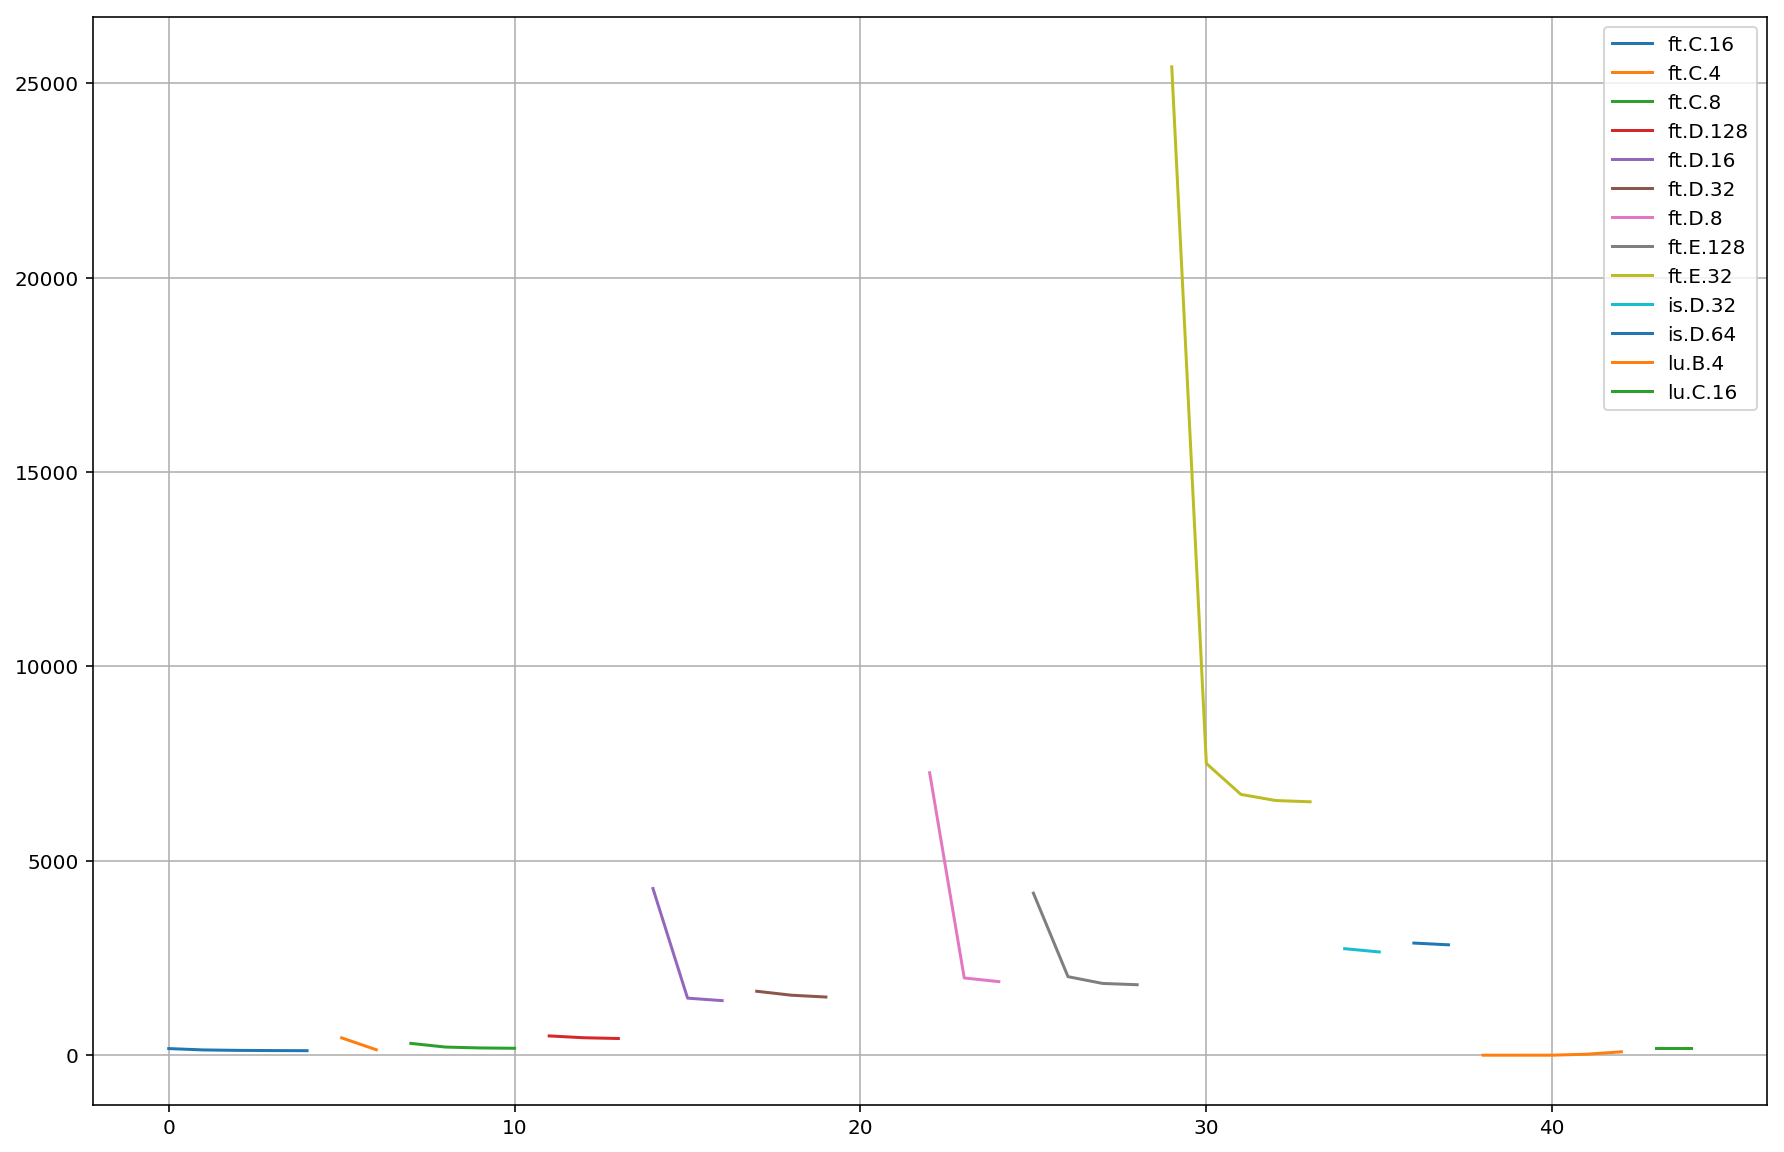

In [106]:
plt.figure(figsize=(15,10))
#remove outliers
df[df.smpi_app != "ft.D.4"].groupby(df.smpi_app).execution_time.plot()
plt.grid()
plt.legend()

/nix/store/83i56s4p53qrmnkp9cvz04fawhhgr6gj-python3-3.6.5-env/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


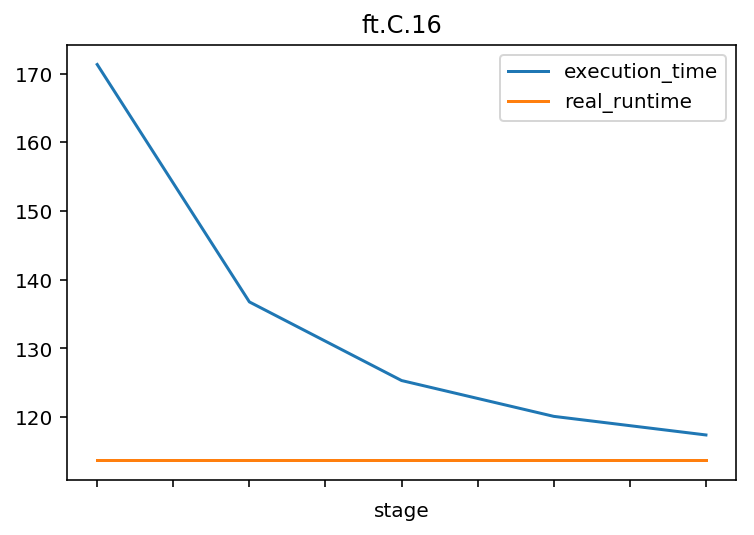

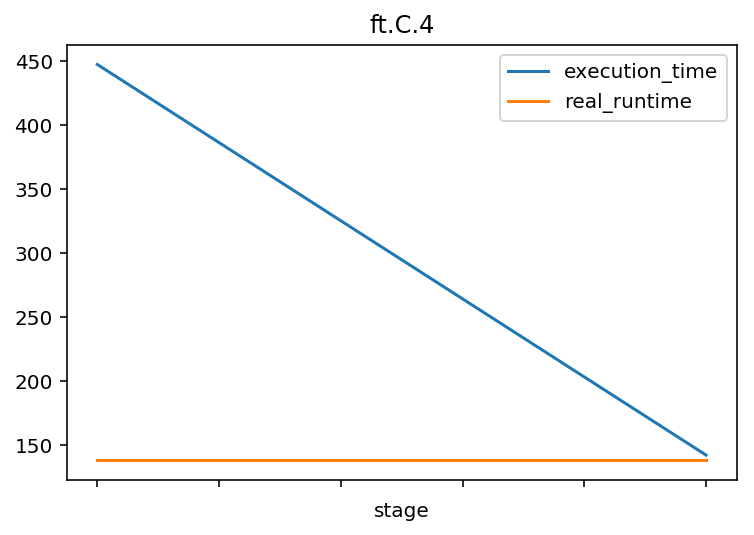

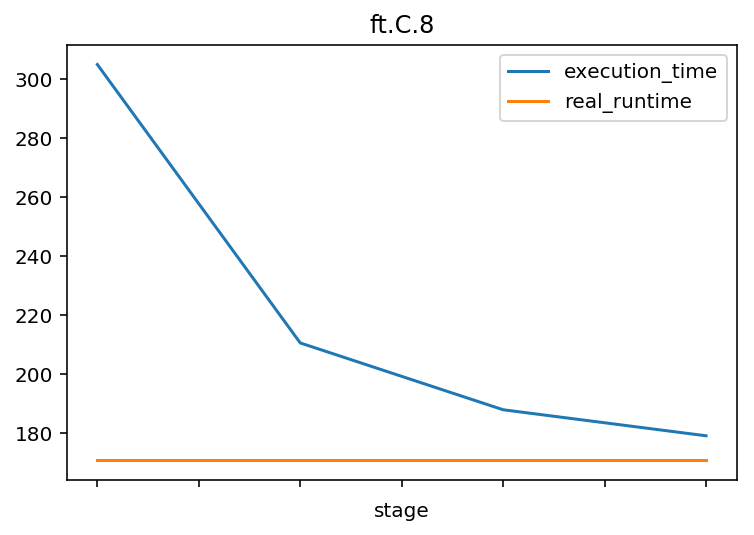

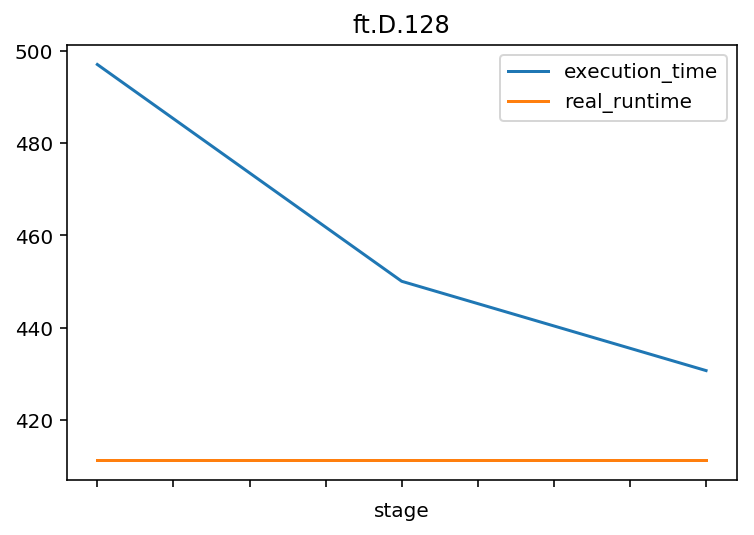

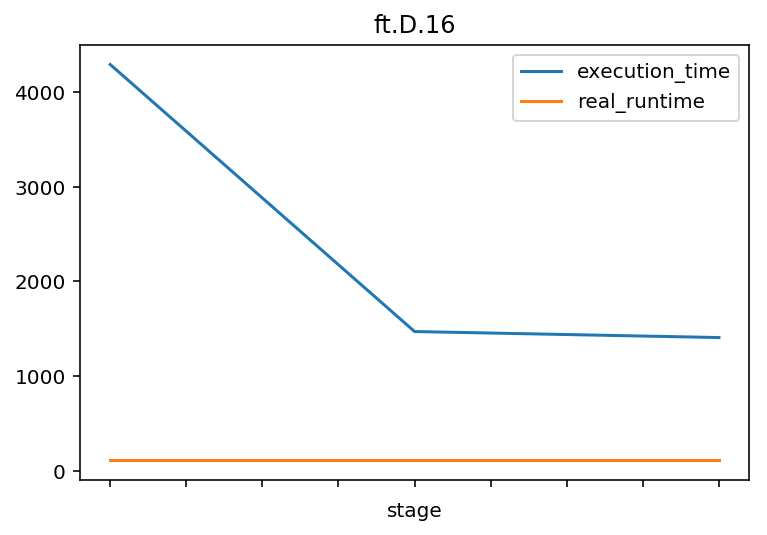

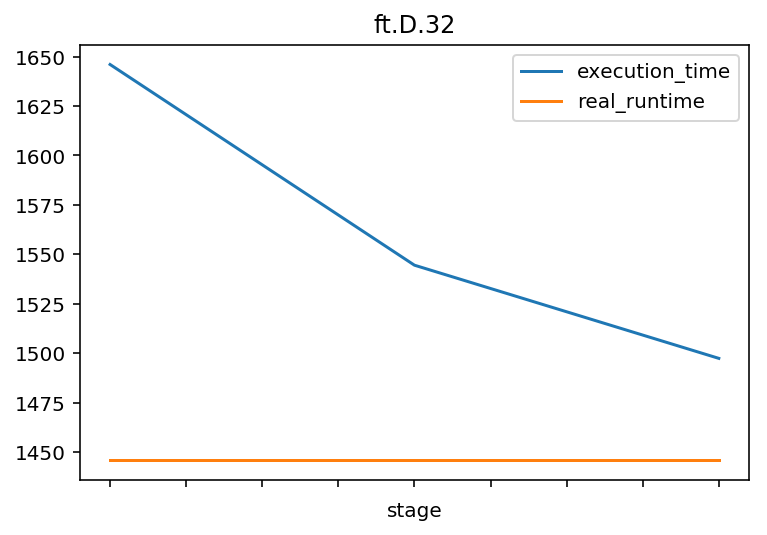

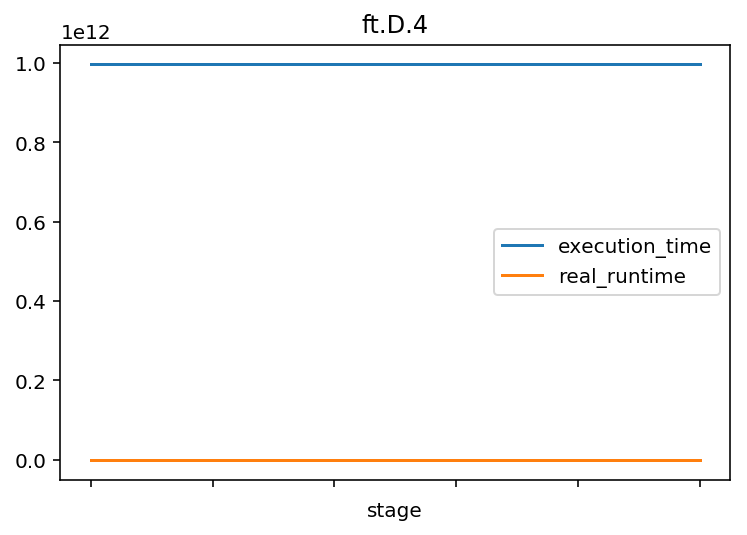

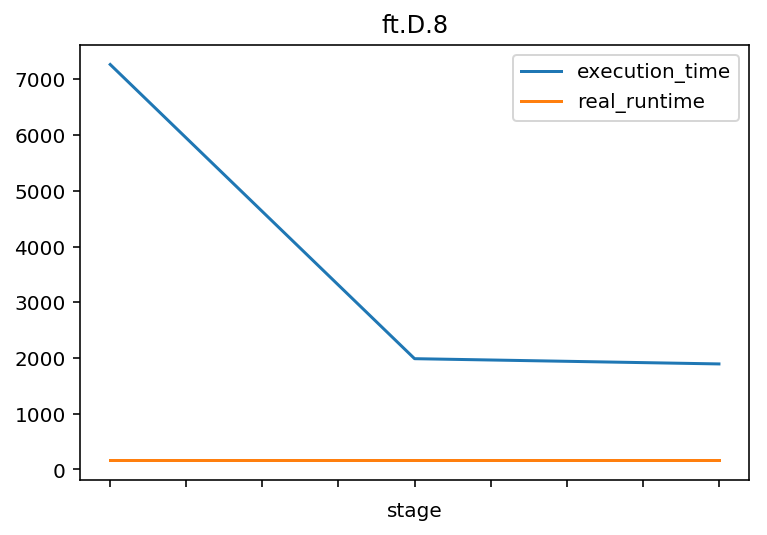

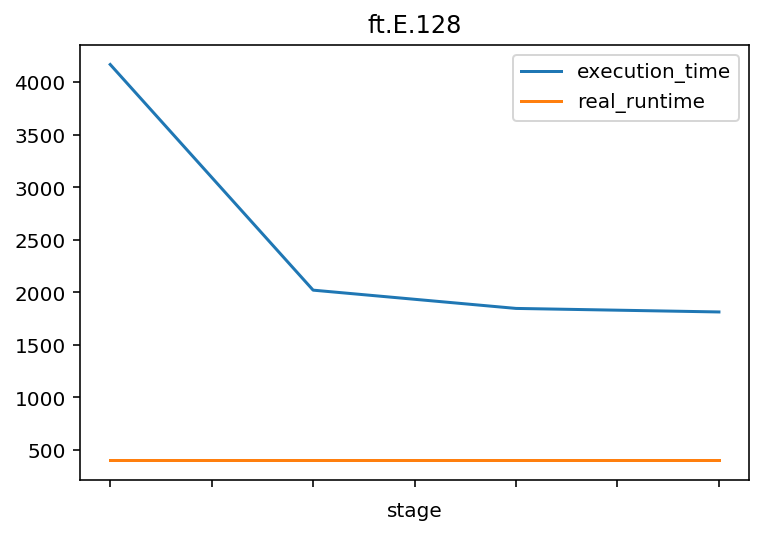

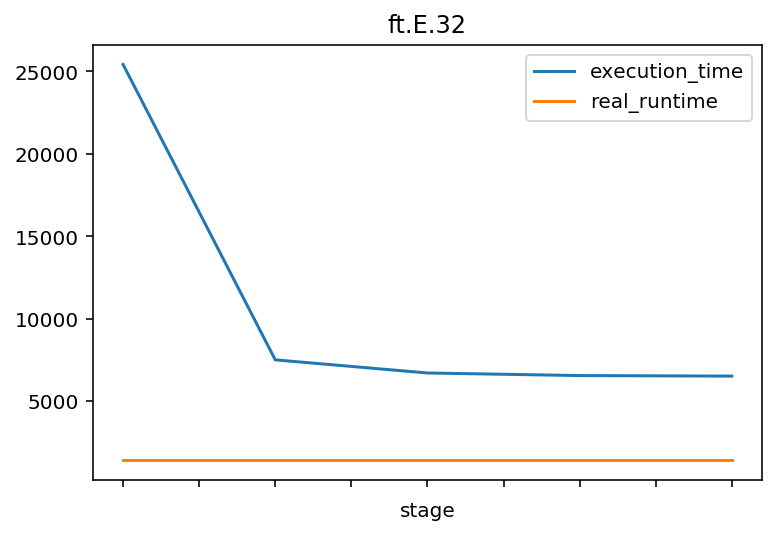

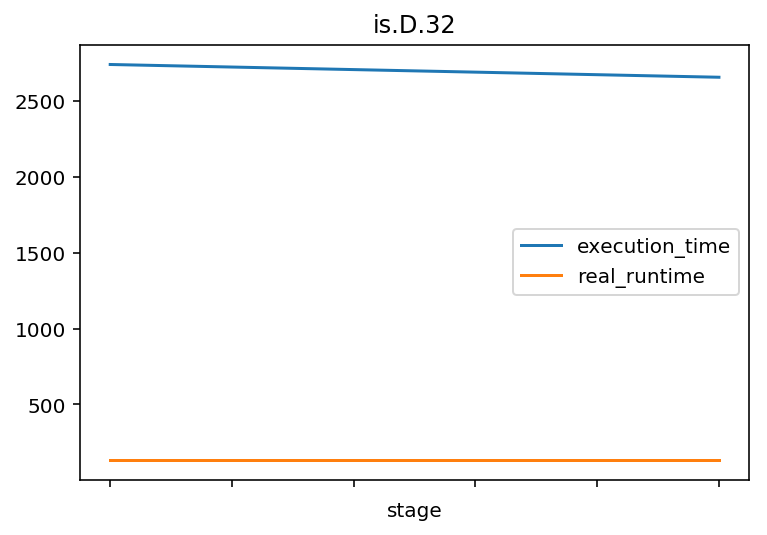

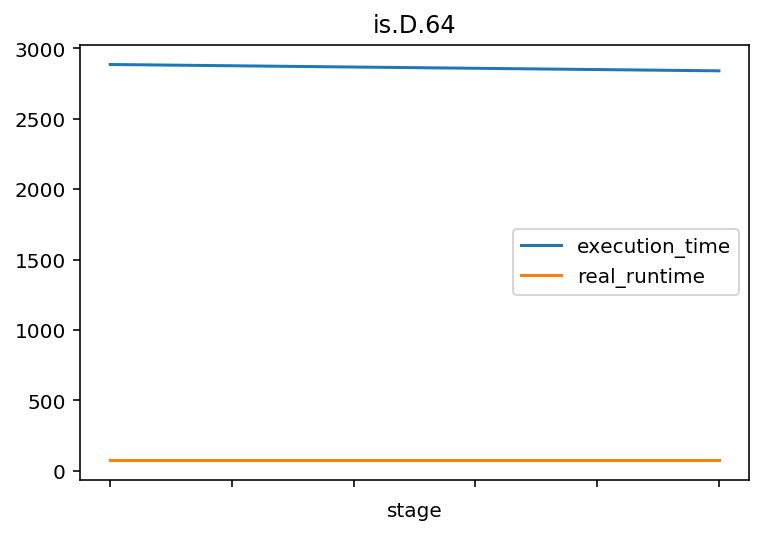

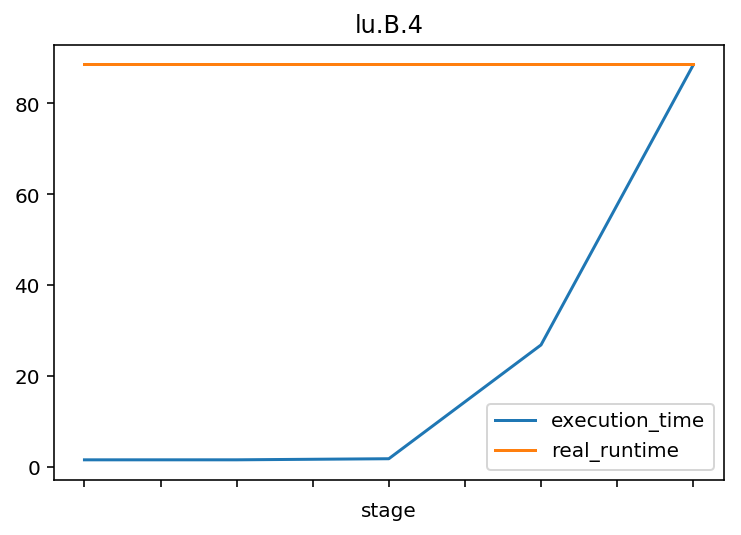

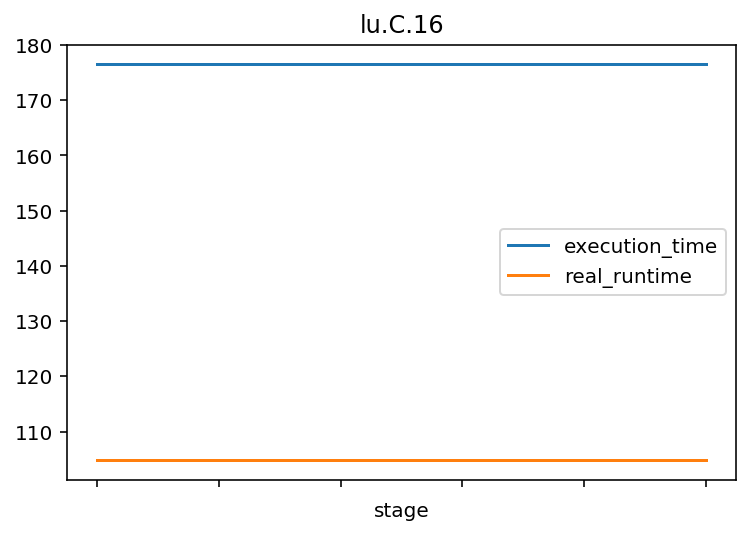

In [98]:
#df.groupby(df.smpi_app)["execution_time", "real_runtime"].plot()


for title, group in df.groupby(df.smpi_app)["execution_time", "real_runtime"]:
    group.plot(x='stage', y=["execution_time", "real_runtime"], title=title)

Filter app to get only the one that fit real execution time

In [29]:
def to_int(col):
    return int(col.split('_')[1])

df = df.assign(stage_int=df.stage.apply(to_int))
df


smpi_app  real_runtime     execution_time    stage  scale_factor  \
0    ft.C.16        113.80             171.32  stage_0          0.66   
1    ft.C.16        113.80             136.78  stage_1          0.83   
2    ft.C.16        113.80             125.34  stage_2          0.91   
3    ft.C.16        113.80             120.13  stage_3          0.95   
4    ft.C.16        113.80             117.42  stage_4          0.97   
5     ft.C.4        138.16             446.98  stage_0          0.31   
6     ft.C.4        138.16             141.86  stage_1          0.97   
7     ft.C.8        170.80             304.91  stage_0          0.56   
8     ft.C.8        170.80             210.45  stage_1          0.81   
9     ft.C.8        170.80             187.79  stage_2          0.91   
10    ft.C.8        170.80             178.96  stage_3          0.95   
11  ft.D.128        411.35             497.03  stage_0          0.83   
12  ft.D.128        411.35             450.04  stage_1          0.91   
13  ft.D.128        411.35             430.69  stage_2          0.96   
14   ft.D.16        113.94           4,288.67  stage_0          0.03   
15   ft.D.16        113.94           1,468.71  stage_1          0.08   
16   ft.D.16        113.94           1,405.19  stage_2          0.08   
17   ft.D.32      1,446.03           1,646.03  stage_0          0.88   
18   ft.D.32      1,446.03           1,544.50  stage_1          0.94   
19   ft.D.32      1,446.03           1,497.36  stage_2          0.97   
20    ft.D.4        137.25 996,124,187,497.69  stage_0          0.00   
21    ft.D.4        137.25 996,124,179,864.35  stage_1          0.00   
22    ft.D.8        172.94           7,266.03  stage_0          0.02   
23    ft.D.8        172.94           1,987.73  stage_1          0.09   
24    ft.D.8        172.94           1,893.56  stage_2          0.09   
25  ft.E.128        405.83           4,169.35  stage_0          0.10   
26  ft.E.128        405.83           2,021.12  stage_1          0.20   
27  ft.E.128        405.83           1,847.17  stage_2          0.22   
28  ft.E.128        405.83           1,813.57  stage_3          0.22   
29   ft.E.32      1,440.49          25,424.46  stage_0          0.06   
30   ft.E.32      1,440.49           7,505.72  stage_1          0.19   
31   ft.E.32      1,440.49           6,709.21  stage_2          0.21   
32   ft.E.32      1,440.49           6,552.47  stage_3          0.22   
33   ft.E.32      1,440.49           6,519.14  stage_4          0.22   
34   is.D.32        135.10           2,740.83  stage_0          0.05   
35   is.D.32        135.10           2,656.75  stage_1          0.05   
36   is.D.64         78.66           2,885.48  stage_0          0.03   
37   is.D.64         78.66           2,840.46  stage_1          0.03   
38    lu.B.4         88.58               1.61  stage_0         55.03   
39    lu.B.4         88.58               1.61  stage_1         54.91   
40    lu.B.4         88.58               1.85  stage_2         47.83   
41    lu.B.4         88.58              26.89  stage_3          3.29   
42    lu.B.4         88.58              88.46  stage_4          1.00   
43   lu.C.16        104.88             176.45  stage_0          0.59   
44   lu.C.16        104.88             176.45  stage_1          0.59   

    stage_int  
0           0  
1           1  
2           2  
3           3  
4           4  
5           0  
6           1  
7           0  
8           1  
9           2  
10          3  
11          0  
12          1  
13          2  
14          0  
15          1  
16          2  
17          0  
18          1  
19          2  
20          0  
21          1  
22          0  
23          1  
24          2  
25          0  
26          1  
27          2  
28          3  
29          0  
30          1  
31          2  
32          3  
33          4  
34          0  
35          1  
36          0  
37          1  
38          0  
39          1  
40          2  
41          3  
42 

In [30]:
df_last = df.iloc[df.groupby("smpi_app")['stage_int'].agg(pandas.Series.idxmax)]
df_last

smpi_app  real_runtime     execution_time    stage  scale_factor  \
4    ft.C.16        113.80             117.42  stage_4          0.97   
6     ft.C.4        138.16             141.86  stage_1          0.97   
10    ft.C.8        170.80             178.96  stage_3          0.95   
13  ft.D.128        411.35             430.69  stage_2          0.96   
16   ft.D.16        113.94           1,405.19  stage_2          0.08   
19   ft.D.32      1,446.03           1,497.36  stage_2          0.97   
21    ft.D.4        137.25 996,124,179,864.35  stage_1          0.00   
24    ft.D.8        172.94           1,893.56  stage_2          0.09   
28  ft.E.128        405.83           1,813.57  stage_3          0.22   
33   ft.E.32      1,440.49           6,519.14  stage_4          0.22   
35   is.D.32        135.10           2,656.75  stage_1          0.05   
37   is.D.64         78.66           2,840.46  stage_1          0.03   
42    lu.B.4         88.58              88.46  stage_4          1.00   
44   lu.C.16        104.88             176.45  stage_1          0.59   

    stage_int  
4           4  
6           1  
10          3  
13          2  
16          2  
19          2  
21          1  
24          2  
28          3  
33          4  
35          1  
37          1  
42          4  
44          1

In [35]:
df_filtered = df_last.query("scale_factor > 0.8 & scale_factor < 1.2")
df_filtered

smpi_app  real_runtime  execution_time    stage  scale_factor  stage_int
4    ft.C.16        113.80          117.42  stage_4          0.97          4
6     ft.C.4        138.16          141.86  stage_1          0.97          1
10    ft.C.8        170.80          178.96  stage_3          0.95          3
13  ft.D.128        411.35          430.69  stage_2          0.96          2
19   ft.D.32      1,446.03        1,497.36  stage_2          0.97          2
42    lu.B.4         88.58           88.46  stage_4          1.00          4

We are lacking a 64 resources app be able to generated a workload because our generation script is working with power of two resource requests.

To fill this hole, we are adding the only 64 resource app which is `is.D.64` to the list:

In [36]:
df_final = df_filtered.append(df_last.query('smpi_app == "is.D.64"'))
df_final

smpi_app  real_runtime  execution_time    stage  scale_factor  stage_int
4    ft.C.16        113.80          117.42  stage_4          0.97          4
6     ft.C.4        138.16          141.86  stage_1          0.97          1
10    ft.C.8        170.80          178.96  stage_3          0.95          3
13  ft.D.128        411.35          430.69  stage_2          0.96          2
19   ft.D.32      1,446.03        1,497.36  stage_2          0.97          2
42    lu.B.4         88.58           88.46  stage_4          1.00          4
37   is.D.64         78.66        2,840.46  stage_1          0.03          1

Add the number of process because it is needed for workload generation

In [40]:
def get_np(col):
    return int(col.split('.')[2])

df_final = df_final.assign(np=df_final.smpi_app.apply(get_np))
df_final

smpi_app  real_runtime  execution_time    stage  scale_factor  stage_int  \
4    ft.C.16        113.80          117.42  stage_4          0.97          4   
6     ft.C.4        138.16          141.86  stage_1          0.97          1   
10    ft.C.8        170.80          178.96  stage_3          0.95          3   
13  ft.D.128        411.35          430.69  stage_2          0.96          2   
19   ft.D.32      1,446.03        1,497.36  stage_2          0.97          2   
42    lu.B.4         88.58           88.46  stage_4          1.00          4   
37   is.D.64         78.66        2,840.46  stage_1          0.03          1   

     np  
4    16  
6     4  
10    8  
13  128  
19   32  
42    4  
37   64

# Generate a workload

In [107]:
workload_dir = os.path.abspath("../workloads")
platform_dir = os.path.abspath("../platforms")
expe_dir = os.path.abspath("../")

First we need to generate the profiles json file:

In [135]:
import json
import os

trace_path = os.path.relpath(os.path.abspath(f"./calibrated_ti_traces"), start=f"{workload_dir}")
# WARNING only works for graphene that has 4 core per nodes
nb_core_per_nodes = 4

profiles = {}
for index, row in df_final.iterrows():
    profile = {}
    pname = row["smpi_app"]
    profile["type"] = "smpi"
    profile["trace"] = f"{trace_path}/{pname}.txt"
    profile["runtime"] = row["execution_time"]
    profile["np"] = int(row["np"] / nb_core_per_nodes)
    profiles[pname] = profile
        
with open("filtered_smpi_profiles.json", "w") as f:
    json.dump({"profiles": profiles}, f, indent=4, sort_keys=True)

In [136]:
!cat filtered_smpi_profiles.json

{
    "profiles": {
        "ft.C.16": {
            "np": 4,
            "runtime": 117.418876,
            "trace": "../HPC_workload_generation/calibrated_ti_traces/ft.C.16.txt",
            "type": "smpi"
        },
        "ft.C.4": {
            "np": 1,
            "runtime": 141.85657700000004,
            "trace": "../HPC_workload_generation/calibrated_ti_traces/ft.C.4.txt",
            "type": "smpi"
        },
        "ft.C.8": {
            "np": 2,
            "runtime": 178.955576,
            "trace": "../HPC_workload_generation/calibrated_ti_traces/ft.C.8.txt",
            "type": "smpi"
        },
        "ft.D.128": {
            "np": 32,
            "runtime": 430.691295,
            "trace": "../HPC_workload_generation/calibrated_ti_traces/ft.D.128.txt",
            "type": "smpi"
        },
        "ft.D.32": {
            "np": 8,
            "runtime": 1497.361608,
            "trace": "../HPC_workload_generation/calibrated_ti_traces/ft.D.32.txt",
            "ty

Then we need to run the workloda generator

In [227]:
nb_jobs = 2
!./json_workload_generator.py \
    filtered_smpi_profiles.json \
    {workload_dir}/workload_hpc_seed1_jobs{nb_jobs}_smpi-filtered_hpc.json 128 \
    --indent 4 \
    --random_seed 1 \
    --job_number {nb_jobs} \
    --job_log_size_sigma 1 \
    --job_iarrival_lambda 50 \
    --job_iarrival_k 1 \
    --maximum_power_of_two 5

In [228]:
!cat {workload_dir}/workload_hpc_seed1_jobs{nb_jobs}_smpi-filtered_hpc.json

{
    "command": "./json_workload_generator.py filtered_smpi_profiles.json /home/mmercier/Projects/bebida-on-batsim/experiments/workloads/workload_hpc_seed1_jobs2_smpi-filtered_hpc.json 128 --indent 4 --random_seed 1 --job_number 2 --job_log_size_sigma 1 --job_iarrival_lambda 50 --job_iarrival_k 1 --maximum_power_of_two 5",
    "date": "2019-01-18 10:54:09.107169",
    "description": "Namespace(indent=4, inputJSON=<_io.TextIOWrapper name='filtered_smpi_profiles.json' mode='r' encoding='UTF-8'>, job_iarrival_k=1.0, job_iarrival_lambda=50.0, job_log_size_mu=1, job_log_size_sigma=1.0, job_number=2, maximum_job_length=None, maximum_power_of_two=5, minimum_power_of_two=2, outputJSON=<_io.TextIOWrapper name='/home/mmercier/Projects/bebida-on-batsim/experiments/workloads/workload_hpc_seed1_jobs2_smpi-filtered_hpc.json' mode='w' encoding='UTF-8'>, random_seed=1, resourcesNumber=128, serial_job_probability=0.25)",
    "jobs": [
        {
            "id": "0_ft.D.128",
            "profile": "f

## Test filtered calibrated job generated workload

We will now compare a generated workload using in one case the SMPI jobs and in the other case a simple time delay.

First, we need to install Batsim and the scheduler:

In [229]:
!nix-env -if {expe_dir}/bebida-exp-replay/bebida_on_batsim_env.nix

replacing old 'bebida_on_batsim_env'
installing 'bebida_on_batsim_env'


In [230]:
%%bash
batsim --version
batsched --version
robin --version

v3.0.0
v1.3.0
v1.2.0


In [284]:
expe_params = {}

index = 0
nb_nodes = 33
storage_prop_name = "HDD"
net_prop_name = "1G"
pfs_net_prop_name = "10G"

bda_workload_option = f"-w /home/mmercier/Projects/bebida-on-batsim/experiments/workloads/bebida_simul_workloads/workload_seed3_jobs25_with_io_bda.json"

for fs_type in ["dfs", "pfs"]:
    result_prefix = f"/tmp/calib-results-{fs_type}"
    filename = f"{result_prefix}_expe.yaml"
    expe_params[filename] = {"fs_type": fs_type,"result_prefix": result_prefix}
    if fs_type == 'dfs':
        platform_option = f"{platform_dir}/platform_graphene_{nb_nodes}nodes_{fs_type}_{net_prop_name}_{storage_prop_name}.xml"
    elif fs_type == 'pfs':
        platform_option = f"{platform_dir}/platform_graphene_{nb_nodes}nodes_{fs_type}_{net_prop_name}_{storage_prop_name}_pfsbw{pfs_net_prop_name}.xml"
    with open(filename, "w") as f:
        to_write = f"""batcmd: >-
          batsim -w {workload_dir}/workload_hpc_seed1_jobs{nb_jobs}_smpi-filtered_hpc.json {bda_workload_option}
          -p {platform_option}
          -r graphene-1.nancy.grid5000.fr:master
          -e {result_prefix}
          --enable-dynamic-jobs
          --acknowledge-dynamic-jobs
          --forward-profiles-on-submission
          -s "ipc:///tmp/batsim-expe-bat-calib-{index}"
output-dir: {result_prefix}
schedcmd: >-
          {expe_dir}/bebida-exp-replay/multisched_wrapper.sh
          {fs_type}
          "ipc:///tmp/batsim-expe-bat-calib-{index}"
          "ipc:///tmp/batsim-expe-hpc-calib-{index}"
          "ipc:///tmp/batsim-expe-bda-calib-{index}"
simulation-timeout: 36000
ready-timeout: 5
success-timeout: 5
failure-timeout: 0
"""
        f.write(to_write)
expe_params

{'/tmp/calib-results-dfs_expe.yaml': {'fs_type': 'dfs',
  'result_prefix': '/tmp/calib-results-dfs'},
 '/tmp/calib-results-pfs_expe.yaml': {'fs_type': 'pfs',
  'result_prefix': '/tmp/calib-results-pfs'}}

In [285]:
for filename in expe_params.keys():
    !time robin {filename}

INFO[2019-01-18 14:47:55.534] Waiting for valid context                     batsim command="batsim -w /home/mmercier/Projects/bebida-on-batsim/experiments/workloads/workload_hpc_seed1_jobs2_smpi-filtered_hpc.json -w /home/mmercier/Projects/bebida-on-batsim/experiments/workloads/bebida_simul_workloads/workload_seed3_jobs25_with_io_bda.json -p /home/mmercier/Projects/bebida-on-batsim/experiments/platforms/platform_graphene_33nodes_dfs_1G_HDD.xml -r graphene-1.nancy.grid5000.fr:master -e /tmp/calib-results-dfs --enable-dynamic-jobs --acknowledge-dynamic-jobs --forward-profiles-on-submission -s \"ipc:///tmp/batsim-expe-bat-calib-0\"" extracted socket endpoint="ipc:///tmp/batsim-expe-bat-calib-0" ready timeout (seconds)=5
INFO[2019-01-18 14:47:55.534] Starting simulation                           batsim cmdfile=/tmp/calib-results-dfs/cmd/batsim.bash batsim command="batsim -w /home/mmercier/Projects/bebida-on-batsim/experiments/workloads/workload_hpc_seed1_jobs2_smpi-filtered_hpc.json -w /ho

In [286]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from evalys.jobset import JobSet
import matplotlib.pyplot as plt
from evalys.visu import legacy as visu
import evalys
import os
import pandas
pandas.options.display.float_format = "{:,.2f}".format

In [287]:
js_dict = {}
for param in expe_params.values():
    js_dict[param["fs_type"]] = JobSet.from_csv(f"{param['result_prefix']}_jobs.csv")
js_dict

{'dfs': <evalys.jobset.JobSet at 0x7f30aec552b0>,
 'pfs': <evalys.jobset.JobSet at 0x7f30aec55da0>}

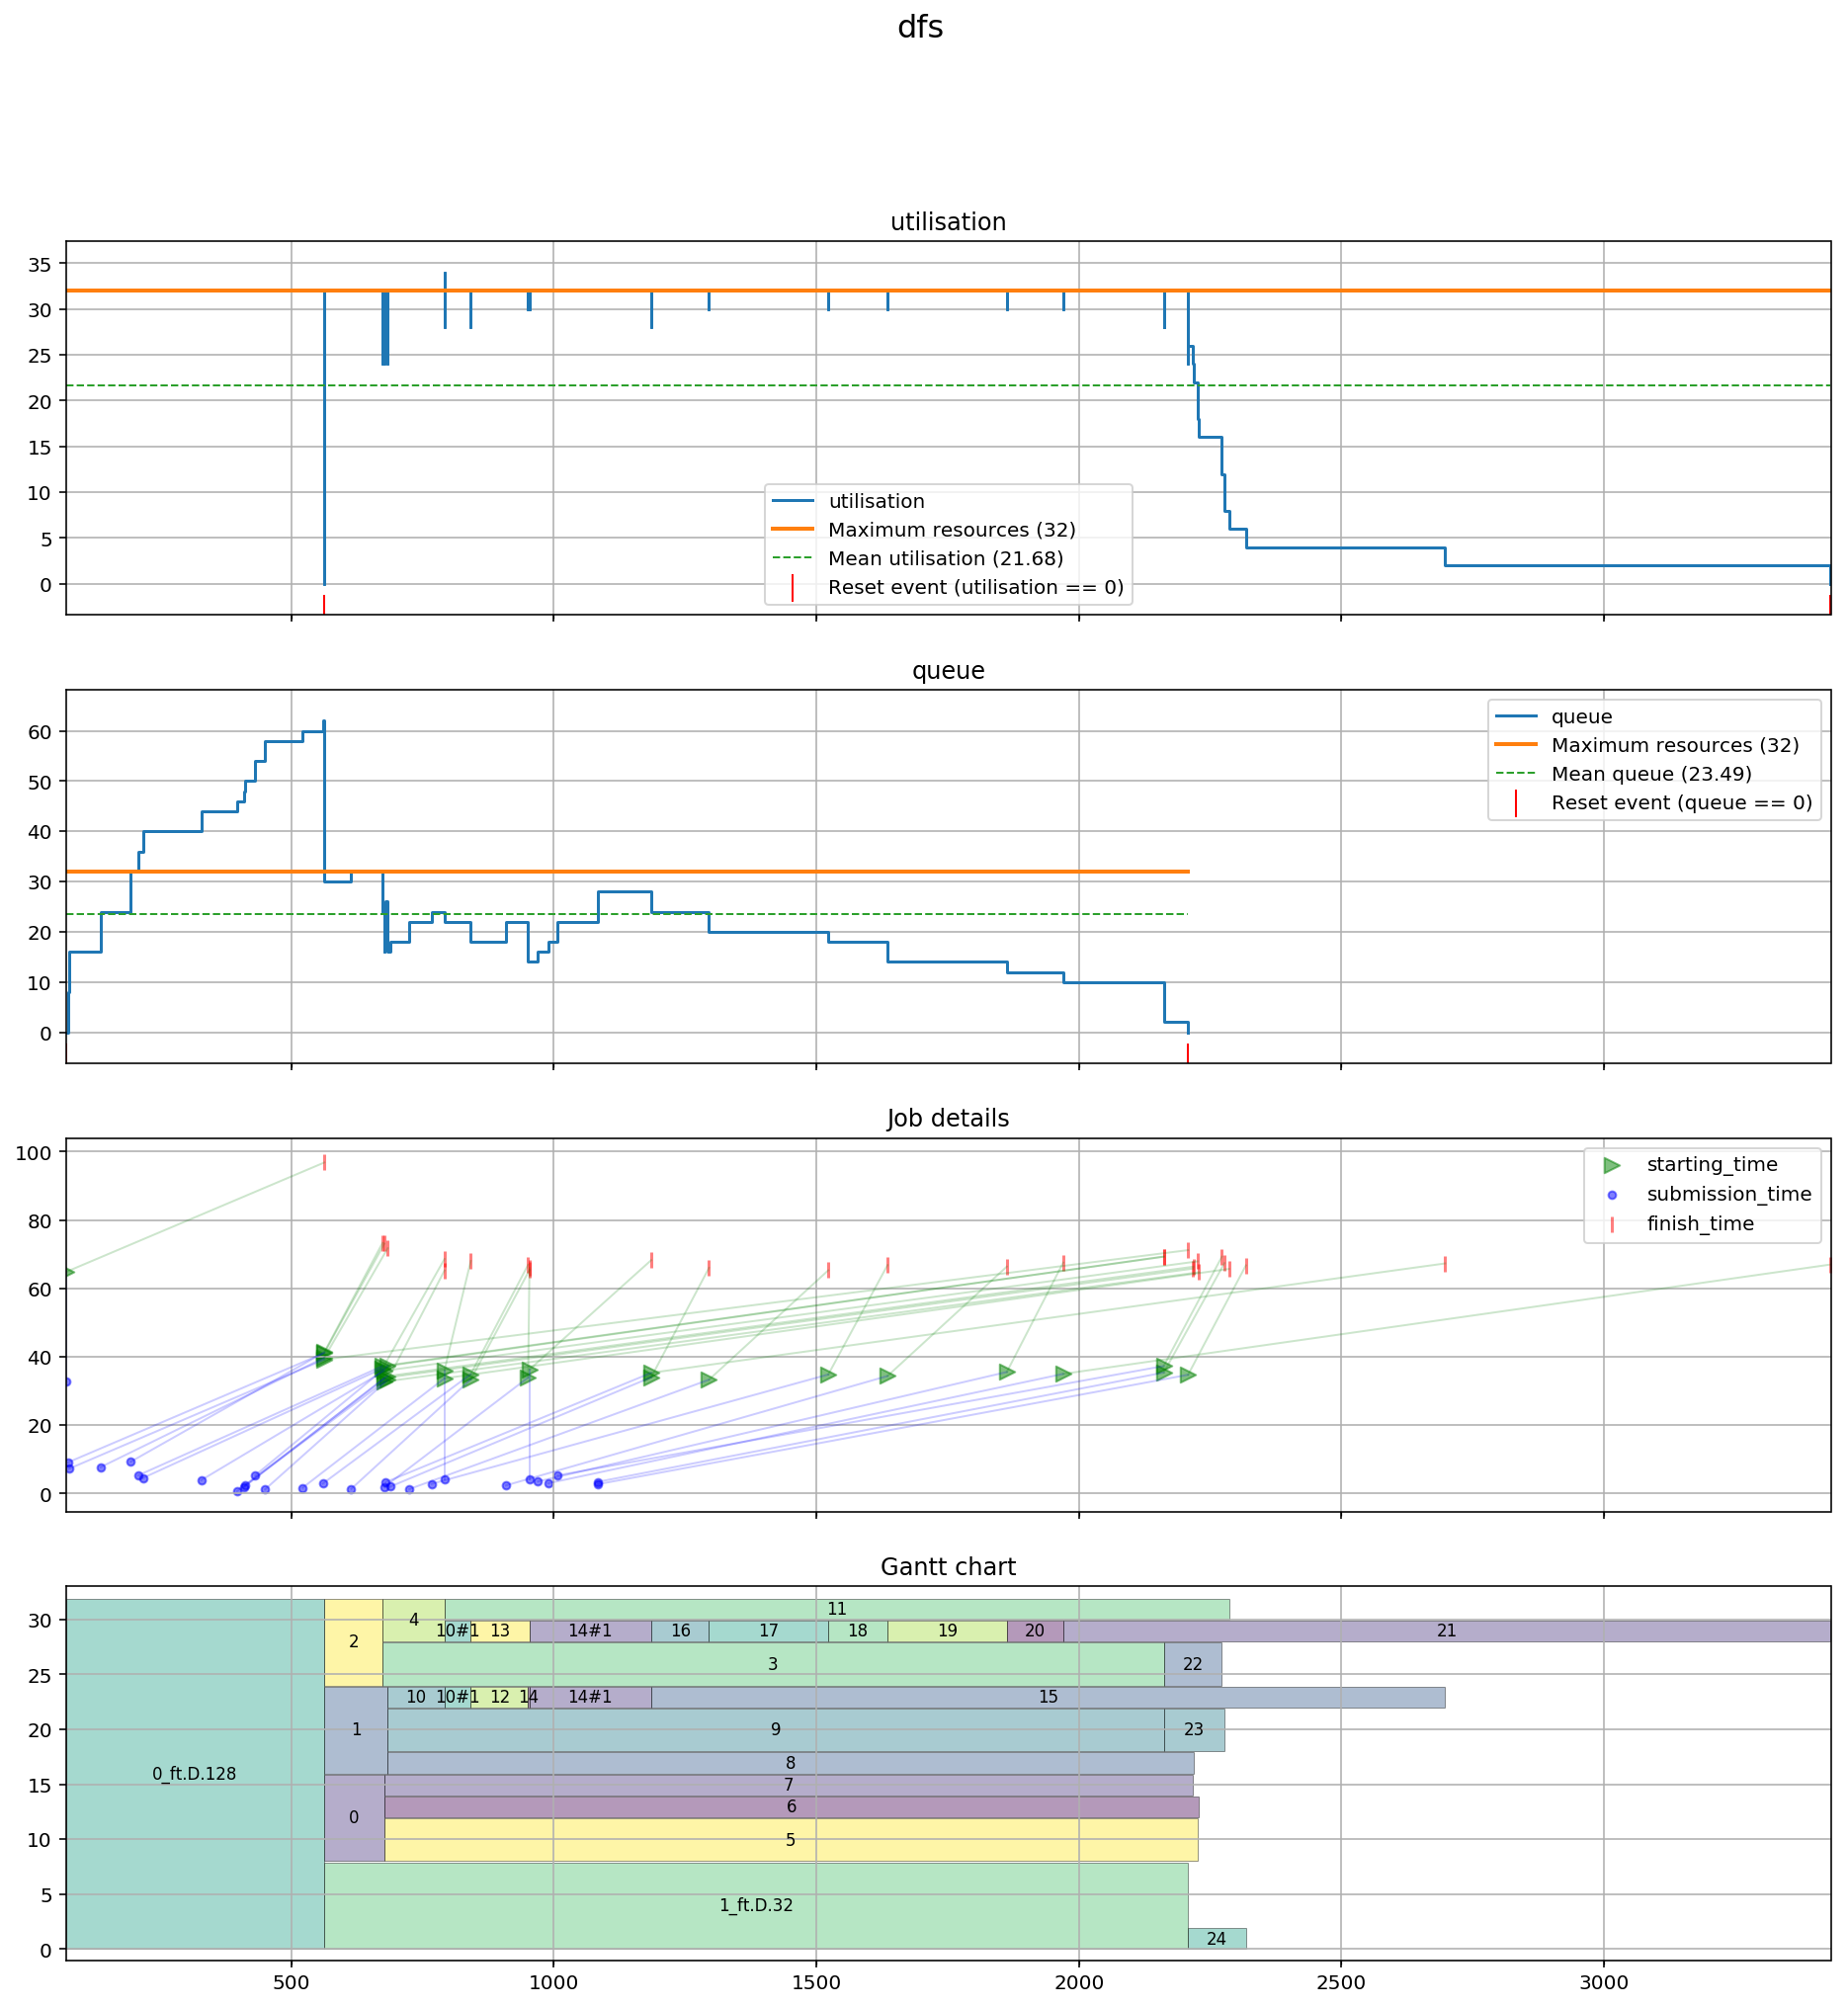

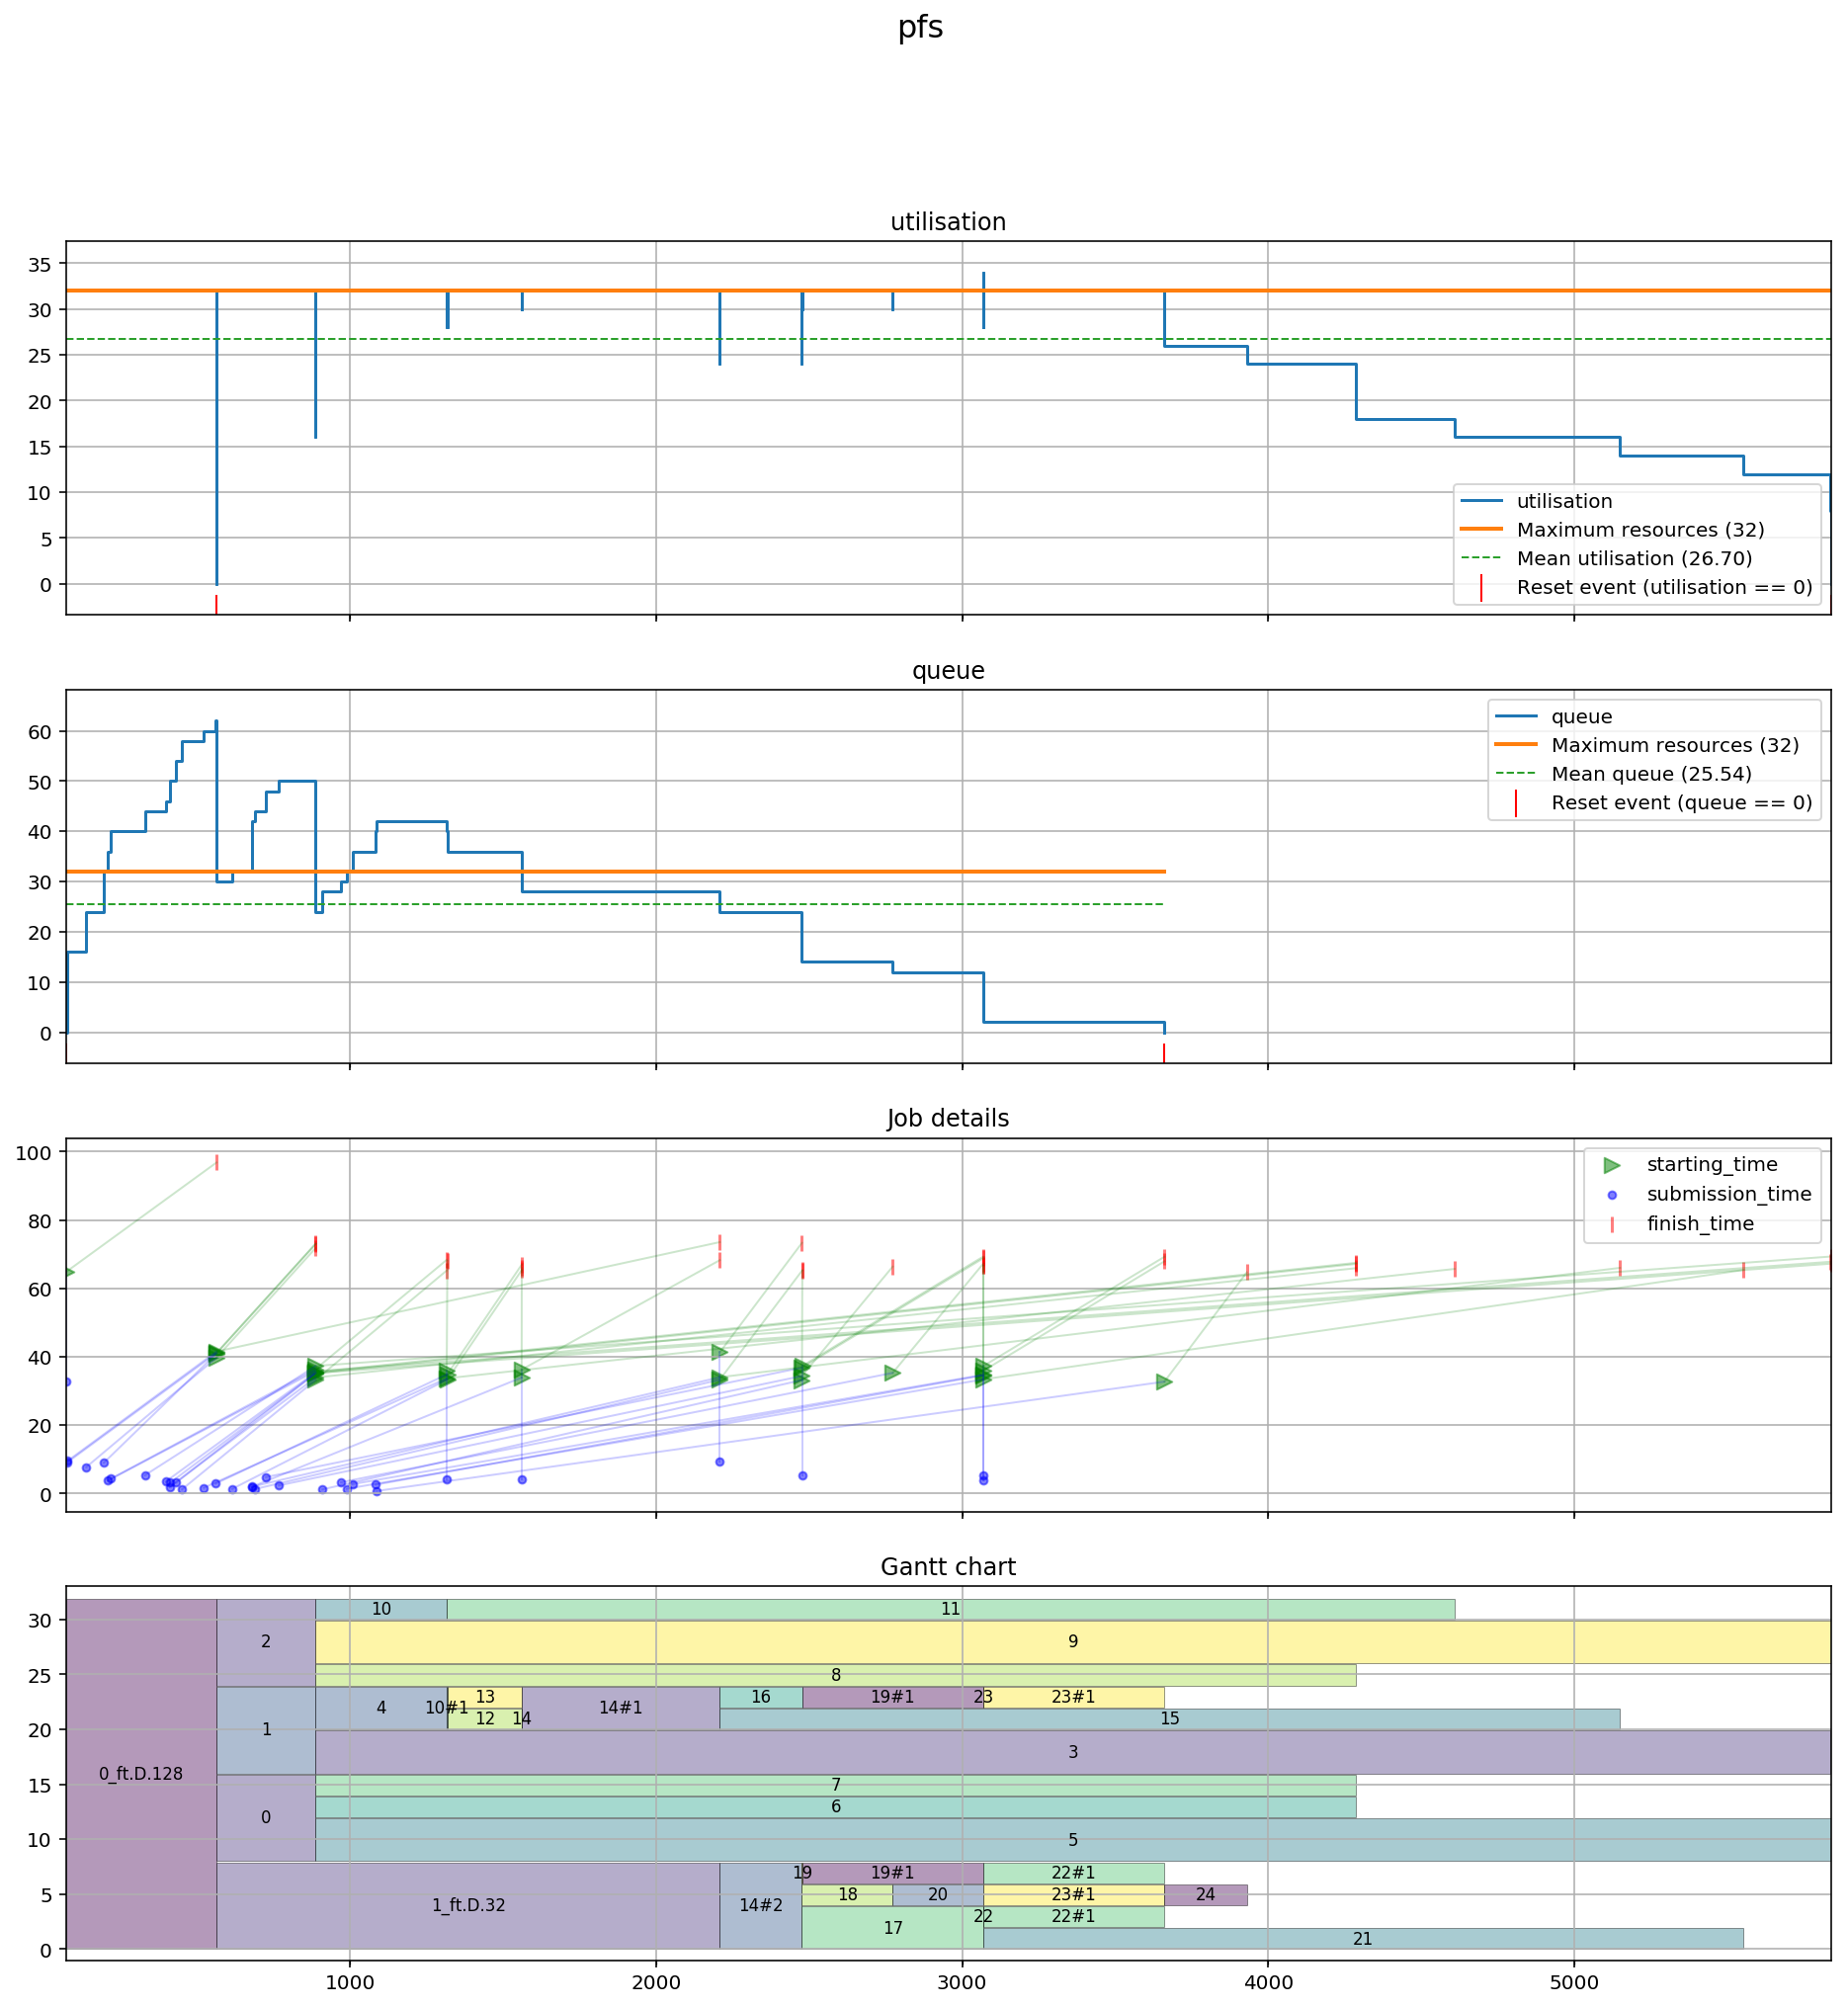

In [288]:
matplotlib.rcParams['figure.figsize'] = 16,16
for fs_type, js in js_dict.items():
    js.plot(with_details=True, title=fs_type)

In [289]:
js.df.query("jobID == '1_ft.D.32'").execution_time

32   1,644.88
Name: execution_time, dtype: float64

In [290]:
matplotlib.rcParams['figure.figsize'] = 30, 30
#matplotlib.rcParams['figure.figsize'] = 12,6


def draw_gant(js_hpc, js_big_data, title=""):
    fig, axe = plt.subplots(nrows=3, sharex=True)
    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.xlabel("Time in seconds")
    plt.ylabel("Number of cores")
    plt.grid(False)
    #ax = axe[0]
    #visu.plot_load(js_hpc.utilisation, js_hpc.MaxProcs,
    #               load_label="HPC BeBiDa utilisation", ax=ax,
    #               time_scale=True, normalize=True)
    ## add big data utilisation reversed
    #
    #visu.plot_load(128 - js_big_data.utilisation, 128,
    #               load_label="Big Data utilisation", ax=ax,
    #               time_scale=True, normalize=True)
    
    def color_app(job, palette):
        tmp = job["jobID"].split('#')
        if len(tmp) == 0:
            val = int(job["jobID"])
        else:
            val = int(tmp[0])
        return palette[val % len(palette)]
    
    def label_fn(job):
        return "\n".join([job["jobID"].split('#')[0], job["profile"].split('#')[0]])
    
    visu.plot_gantt(js_big_data, ax=axe[0], color_function=color_app, #label_function=label_fn,
                    labels=True, title="Big Data workload")
    
    visu.plot_gantt(js_hpc, ax=axe[1],label_function=label_fn,
                    labels=True, title="HPC workload")
    
    col = evalys.visu.generate_palette(2)
    def one_color_blue(job, palette):
        return col[0]
    
    def one_color_yellow(job, palette):
        return col[1]
    
    visu.plot_gantt(js_big_data, ax=axe[2], color_function=one_color_blue,
                    labels=False)
    visu.plot_gantt(js_hpc, ax=axe[2], color_function=one_color_yellow,
                    labels=False, title="Mixed HPC and Big Data workloads")
    
    [ax.grid(False) for ax in axe]
    plt.title(title)
    fig.tight_layout()

In [ ]:
js_hpc = JobSet(js.df[js.df.workload_type == "hpc"], resource_bounds=js.res_bounds)
js_bda = JobSet(js.df[js.df.workload_type == "bda"], resource_bounds=js.res_bounds)

draw_gant(js_hpc, js_bda)